# Homework 1 Solutions
Modules that we'll use for our solutions.

In [55]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use LaTex
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn')

## Question 1
(a) Write a function that implements the gradient descent algorithm in Python. Set respective default arguments for $h$, $\eta$, $\alpha$, $\beta$, and $N$ of $10^{-2}$, $10^{-3}$, $10^{-6}$, $10^6$, and $100000$.

In [56]:
# Part (a)
def gradient_descent(f, x0, h=1e-2, eta=1e-3, alpha=1e-6, beta=1e6, N=100000):
    
    # Calculate numerical derivative
    g = lambda x: (f(x + h) - f(x - h))/(2 * h)
    
    # Terminate process after N iterations
    for _ in range(int(N)):
        
        # Update x
        x = x0 - eta * g(x0)  
        
        # Calculate whether close enough to return answer
        if np.abs(x - x0) < alpha:          
            return x 
        
        # Calculate whehter so far apart better to terminate
        elif np.abs(x - x0) > beta:
            return np.nan
        
        # If neither of those update x0 and continue
        else:        
            x0 = x
    
    # Return np.nan if fails to converge after N iterations
    return np.nan


Define $f$ and picks some $x$-values for parts (b) and (c). We'll also define a new function to find local minima.

In [57]:
# Define function
f = lambda x: 3*x**4 - 16 * x**3 + 6 * x**2 + 72 * x + 5

# Define x-values to use for guesses
x_guesses = np.linspace(-10, 10, 20)

# Define function to get local minima
def find_local_min_x_vals(f, x_guesses):
    
    # Calculate f'
    f_prime = lambda x: (f(x + 1e-3) - f(x - 1e-3))/2e-3
    
    # Make sure x guesses don't make f'equal 0
    x_guesses_mod = [x0 for x0 in x_guesses if not np.isclose(f_prime(x0), 0.0)]
    
    # Initialize array to hold x-values of local minima
    min_x_vals = np.zeros(len(x_guesses_mod))

    # Loop over guesses
    for i, x0 in enumerate(x_guesses_mod):
    
        # Record results
        min_x_vals[i] = gradient_descent(f, x0)

    # Remove nan values
    min_x_vals = min_x_vals[min_x_vals == min_x_vals]

    # Not quite numerically stable so round
    min_x_vals = np.round(min_x_vals, 3)

    # Convert to unique solutions
    min_x_vals = np.unique(min_x_vals)
    
    return min_x_vals
        

(b) Pick a few values of $x_0$ and use your function from (a) to find the local minima of $f$.

In [58]:
# Get x-values of local minima
min_x_vals = find_local_min_x_vals(f, x_guesses)

# Calculate corresponding y-values
min_y_vals = f(min_x_vals)

# Print results
print(r'Local minima of f:')

for x, y in zip(min_x_vals, min_y_vals):
    
    print(f'(x, y) = ({x}, {y})')
    

Local minima of f:
(x, y) = (-1.0, -42.0)
(x, y) = (3.0, 86.0)


(c) Repeat (b) with $-f$ instead of $f$ to find the local maxima of $f$.

In [59]:
# Minimizing -f is the same as maximizing f
neg_f = lambda x: -f(x)

# Get x-values of local minima
max_x_vals = find_local_min_x_vals(neg_f, x_guesses)

# Calculate corresponding y-values
max_y_vals = f(max_x_vals)

# Print results
print(r'Local maxima of f:')

for x, y in zip(max_x_vals, max_y_vals):
    
    print(f'(x, y) = ({x}, {y})')


Local maxima of f:
(x, y) = (2.0, 93.0)


(d) Verify your work by using $\texttt{plot}$ and $\texttt{scatter}$ in $\texttt{matplotlib.pyplot}$ to plot $f$ and your local extrema, respectively.

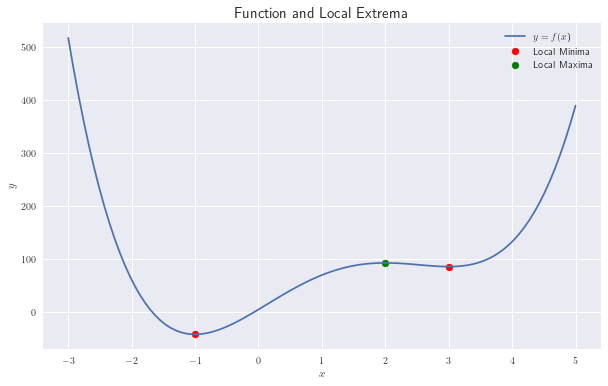

In [60]:
# Get x-values for plot
x_vals = np.linspace(-3, 5, 100)

# Calculate y-values for plot
y_vals = f(x_vals)

# Make figure bigger
plt.figure(figsize = (10, 6))

# Plot function
plt.plot(x_vals, y_vals, label = r'$y = f(x$)')

# Draw scatter plot for local minima
plt.scatter(min_x_vals, min_y_vals, label = 'Local Minima', 
            color = 'red')

# Draw scatter plot for local maxima
plt.scatter(max_x_vals, max_y_vals, label = 'Local Maxima', 
            color = 'green')

# Add title
plt.title(r'Function and Local Extrema', fontsize = 15)

# Add x-label
plt.xlabel(r'$x$')

# Add y-label
plt.ylabel(r'$y$')

# Add legend
plt.legend()

plt.show()

## Question 2
We want to estimate the area under the curve $y = e^{-\sqrt{x}}$ from $x = 1$ to $x = 100$. Let's define our Riemann integral here. Also, we'll define a function that produces $P$.

In [48]:
# Define Riemann sum
def riemann_sum(f, P, pts):
    
    # Sort values
    P = np.sort(P)

    # Calculate Delta x
    dx_vals = np.diff(P) 

    # Define T
    if pts == 'left':

        T = P[:-1]

    elif pts == 'right':

        T = P[1:]

    elif pts == 'mid':
        
        T = (P[:-1] + P[1:])/2
        
    else:
        
        raise Exception('Currently only left, right, and midpoints are supported!')
        
    # Get area of rectangles; assumes f is vectorized
    rectangle_areas = f(T) * dx_vals
    
    # Return sum
    return np.sum(rectangle_areas)


# Function to get P
def get_P(a, b, n, method = 'uniform'):
    
    if method == 'uniform':
        
        return np.linspace(a, b, n + 1)
        
    elif method == 'log':
        
        return np.logspace(np.log10(a), np.log10(b), n + 1)
    
    else:
        
        raise Exception('There is no implementation for this method!')
        

# Define integrand
g = lambda x: np.exp(-np.sqrt(x))


(a) Approximate the area using a Riemann sum with
$$
P = \left(1, 1 + \frac{99}{n} , 1 + \frac{99\cdot 2}{n},\ldots, 1 + \frac{99\cdot (n - 1)}{n}, 100\right).
$$ 
Find the height of each rectangle using the left, middle, and right points of each subinterval determined by consecutive entries of $P$. Calculate the results for $n = 10,\; 25,\; 50,\; 75,$ and $100$ rectangles. Save your results in a $\texttt{pandas}$ data frame.

(b) In part (a), the Riemann sum was calculated using a uniform partition, which is not the most efficient way to approximate the area. This is because $e^{-\sqrt{x}} \approx 0$ for $ x\gg 0$. The approximation will be better if we sample more small values of $x$ and fewer large values. With this reasoning in mind repeat (a) but with
$$
P = \left(1, 100^{1/n}, 100^{2/n},\ldots, 100^{(n - 1)/n}, 100\right).
$$ 

In [49]:
# Parts (a) and (b)

# Define n-values
n_vals = [10, 25, 50, 75, 100]

# Initialize data frames to hold results
uni_df = pd.DataFrame(index = n_vals, columns = ['left', 'mid', 'right'])
log_df = pd.DataFrame(index = n_vals, columns = ['left', 'mid', 'right'])

# Loop over n-values
for n in n_vals:
    
    # Generate the P's
    P_uni = get_P(1, 100, n, 'uniform')
    P_log = get_P(1, 100, n, 'log')
    
    for pts in ['left', 'mid', 'right']:
        
        uni_df.loc[n, pts] = riemann_sum(g, P_uni, pts)
        log_df.loc[n, pts] = riemann_sum(g, P_log, pts)     
 
# Let's see the results
print('Uniform partition:\n')
print(uni_df)
print('\n')
print('Log partition:\n')
print(log_df)


Uniform partition:

         left       mid     right
10   4.182437  1.159157   0.54088
25   2.395829  1.384797  0.939206
50   1.890313  1.444197  1.162002
75   1.738941  1.458065    1.2534
100  1.667255  1.463321  1.303099


Log partition:

         left       mid     right
10   1.969399  1.437359  1.108519
25    1.65079  1.465123  1.311941
50   1.557744  1.469167   1.38871
75   1.528043  1.469918  1.415401
100   1.51343  1.470181  1.428961


(c) Use analytic techniques to find the exact area
$$
\int_1^{100} e^{-\sqrt{x}}\ dx.
$$

**Solution**  We will do a $u$-substitution and then integration by parts.
\begin{align*}
    \int_1^{100} e^{-\sqrt{x}}\ dx &= 2\int_1^{10} u e^{-u}\ du\\
                                   &= -2ue^{-u}\Big|_1^{10} + 2\int_1^{10} e^{-u}\ du\\
                                   &= -2ue^{-u}\Big|_1^{10} - 2 e^{-u}\Big|_1^{10}\\
                                   &= 4e^{-1} -22 e^{-10}\\
                                   &\approx 1.4705
\end{align*}


(d) Using $\texttt{matplotlib.pyplot}$, graph your results from parts (a) and (b) via the function $\texttt{scatter}$. Use $\texttt{subplots}$ to create three subplots, one for left endpoints, midpoints, and right endpoints.  In each subplot, draw a dashed horizontal red line using $\texttt{axhline}$ to denote your result from part (c). Make sure to add labels and legends so that it is easy to identify all of your subplots' features.

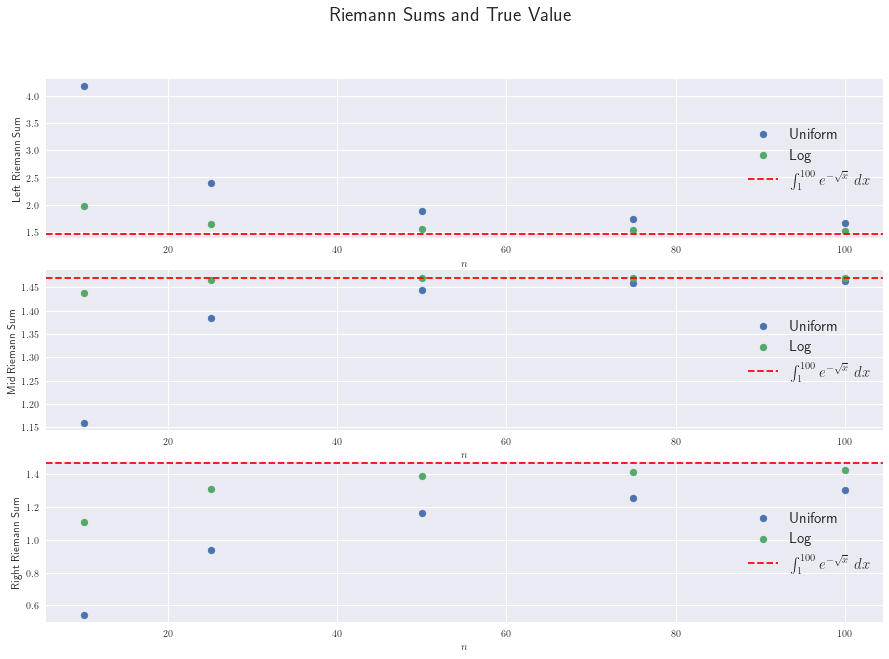

In [50]:
# Define variable to hold result from (c)
I = 4 * np.exp(-1) - 22 * np.exp(-10)

# Initialize subplot
fig, ax = plt.subplots(3, 1, figsize = (15, 10))

# Loop over what point in the subintervals we're using for the height
for i, pts in enumerate(['left', 'mid', 'right']):
    
    # Plot the uniform partition result
    ax[i].scatter(n_vals, uni_df[pts], label = r'Uniform')
    
    # Plot the log-uniform partition result
    ax[i].scatter(n_vals, log_df[pts], label = r'Log')
    
    # Plot the true result
    ax[i].axhline(I, xmin = 0, xmax = n_vals[-1], color = 'red', 
                  linestyle = 'dashed', 
                  label = r'$\int_1^{100} e^{-\sqrt{x}}\ dx$')
    
    # Add labels
    ax[i].set_xlabel(r'$n$')
    ax[i].set_ylabel(f'{pts.title()} Riemann Sum')
    
    # Add legend
    ax[i].legend(loc = 'right', fontsize = 15)
 
# Add title to plot
plt.suptitle(r'Riemann Sums and True Value', fontsize = 20)

plt.show()

## Question 3
You have graduated from the MFE program and landed yourself a nice job pricing annuities! For each of the following perpetuities (i.e. annuities with never ending payments) find the price, or prove that the result would not converge. Assume one payment is made at the end of each year and a constant annual discount rate of 7\%. Let us say that it is January 1, 2024 for simplicity.

(a) Payments of $10.

**Solution** The NPV is
$$
\frac{10}{1.07} + \frac{10}{1.07^2} + \ldots = \sum_{k = 1}^\infty \frac{10}{1.07^k}.
$$
Using the Geometric series formula

$
\begin{align*}
\sum_{k = 1}^\infty \frac{10}{1.07^k} 
&= \sum_{k = 1}^\infty \frac{10}{1.07}\left(\frac{1}{1.07}\right)^{k - 1}\\
&= \frac{10}{1.07}\frac{1}{1 - \frac{1}{1.07}}\\
&= \frac{10}{0.07}\\
&\approx 142.86.
\end{align*}
$

Hence, the perpetuity is worth about \$142.86.

(b) Payments of the numerical value of the year, e.g. the perpetuity would pay \$2024 this year.

**Solution1** We know that
$$
\frac{1}{1 - x} = \sum_{k = 0}^\infty x^k.
$$
Taking the derivative
$$
\frac{1}{(1 - x)^2} = \sum_{k = 1}^\infty k x^{k - 1}.
$$
Hence,
$$
\frac{x}{(1 - x)^2} = \sum_{k = 1}^\infty k x^{k}.
$$
Let us call the value of the perpetuity $P$. Then

$
\begin{align*}
P &= \frac{2024}{1.07} + \frac{2025}{1.07^2} + \ldots\\
   &= \sum_{k = 1}^\infty \frac{2023 + k}{1.07^k}\\ 
   &= \sum_{k = 1}^\infty \frac{2023}{1.07}\left(\frac{1}{1.07}\right)^{k - 1} + \sum_{k = 1}^\infty k\left(\frac{1}{1.07}\right)^k\\
   &= \frac{2023}{1.07}\frac{1}{1 - \frac{1}{1.07}} + \frac{\frac{1}{1.07}}{\left(1 - \frac{1}{1.07}\right)^2}\\
   &= \frac{2023}{0.07} + \frac{1.07}{0.07^2}\\
   &\approx 29118.37.
\end{align*}
$

So, this perpetuity is worth about \$29,118.37.

**Solution2** Let
$$
P = \frac{2024}{1.07} + \frac{2025}{1.07^2} + \ldots.
$$
Then we have
$$
1.07 P = 2024 + \frac{2025}{1.07} + \frac{2026}{1.07^2} + \ldots.
$$
It follows that $1.07P - P$ is
$$
\begin{align*}
    0.07P &= 2024 + \frac{1}{1.07} + \frac{1}{1.07^2} + \ldots\\
          &= 2024 + \frac{\frac{1}{1.07}}{1 - \frac{1}{1.07}}\\
          &= 2024 + \frac{1}{0.07}.
\end{align*}
$$
Dividing both sides by 0.07 yields
$$
P = \frac{2024}{0.07} + \frac{1}{0.07^2} \approx 29118.37.
$$
Therefore, this perpetuity is worth about \$29,118.37, which is the same result as before.

(c) A payment of $\$1$ this year, an increase of 10\% per year for the next four years, and an increase of 5\% per year after that. That is, a payment sequence of
$$
\$1, \$1.10, \$1.10^2, \$1.10^3, \$1.10^4, \$1.10^4\times 1.05, \$1.10^4\times 1.05^2,\ldots.
$$

**Solution** The idea is to break this up into a finite geometric series and an infinite geometric series. Say the value of the perpetuity is $P$. Then

$
\begin{align*}
P &= \frac{1}{1.07} + \frac{1.10}{1.07^2} + \ldots + \frac{1.10^4}{1.07^5} + \frac{1.10^4 \cdot 1.05}{1.07^6} + \frac{1.10^4 \cdot 1.05^2}{1.07^7} + \ldots\\
&= \sum_{k = 1}^5 \frac{1}{1.07}\left(\frac{1.10}{1.07}\right)^{k - 1} + \sum_{k = 1}^\infty \frac{1.10^4\cdot 1.05}{1.07^6}\left(\frac{1.05}{1.07}\right)^{k - 1}\\
&= \frac{1}{1.07}\sum_{k = 1}^5 \left(\frac{1.10}{1.07}\right)^{k - 1} + \frac{1.10^4\cdot 1.05}{1.07^6}\sum_{k = 1}^\infty \left(\frac{1.05}{1.07}\right)^{k - 1}\\
&= \frac{1}{1.07} \frac{1 - \left(\frac{1.10}{1.07}\right)^5}{1 - \frac{1.10}{1.07}} + \frac{1.10^4\cdot 1.05}{1.07^6} \frac{1}{1 - \frac{1.05}{1.07}}\\
&= \frac{\left(\frac{1.10}{1.07}\right)^5 - 1}{0.03} + \frac{1.10^4\cdot 1.05}{1.07^5\cdot 0.02}\\
&\approx 59.75.
\end{align*}
$

Hence, this perpetuity is worth about \$59.75.

(d) Payments of $\$ k^k$ in the $k$-th year, where 2024 corresponds to $k = 1$.

**Solution** This does not converge. In summation notation, the value of this perpetuity is
$$
\sum_{k = 1}^\infty \frac{k^k}{1.07^k} = \sum_{k = 1}^\infty \left(\frac{k}{1.07}\right)^k.
$$
It is clear
$$
\left(\frac{k}{1.07}\right)^k > \frac{k}{1.07}
$$
for $k\geq 2$. Furthermore,
$$
\lim_{k\to\infty} \frac{k}{1.07} = \infty \neq 0.
$$
Because
$$
\sum_{k = 1}^\infty \frac{k}{1.07}
$$
does not converge, neither does 
$$
\sum_{k = 1}^\infty \frac{k^k}{1.07^k}.
$$